# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 10.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
247887,0.0879,0.0024,0.0024,0.0024,0.0024,0.0220,0.2246,0.2588,0.0024,0.0708,0,0,0,0
116933,0.0024,0.0024,0.0049,0.0024,0.0024,0.0073,0.1147,0.3052,0.0024,0.0024,0,0,0,0
185581,0.0024,0.0024,0.0049,0.0024,0.0073,0.0024,0.0415,0.1514,0.0024,0.0024,0,0,0,0
103732,0.0024,0.1221,0.1025,0.0757,0.0537,0.0977,0.4810,0.2930,0.1709,0.4517,4,4,1,1
292666,0.0024,0.7373,0.6323,0.2808,0.1685,0.3613,1.1133,2.5220,0.4492,0.6226,4,4,6,6


In [3]:
raw_data.shape

(457928, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457928 entries, 0 to 457927
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          457928 non-null  float64
 1   Emg2          457928 non-null  float64
 2   Emg3          457928 non-null  float64
 3   Emg4          457928 non-null  float64
 4   Emg5          457928 non-null  float64
 5   Emg6          457928 non-null  float64
 6   Emg7          457928 non-null  float64
 7   Emg8          457928 non-null  float64
 8   Emg9          457928 non-null  float64
 9   Emg10         457928 non-null  float64
 10  repetition    457928 non-null  int64  
 11  rerepetition  457928 non-null  int64  
 12  stimulus      457928 non-null  int64  
 13  restimulus    457928 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.9 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000
mean,0.019734,0.092321,0.083216,0.039534,0.026400,0.077164,0.301754,0.385765,0.156294,0.221862,3.219882,2.347234,5.706694,4.335299
std,0.079264,0.215375,0.215094,0.095570,0.055138,0.147718,0.381117,0.587775,0.381881,0.358927,3.488817,3.285902,6.594477,6.373268
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.075700,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.002400,0.002400,0.002400,0.024400,0.188000,0.151400,0.002400,0.092800,2.000000,0.000000,3.000000,0.000000
75%,0.014600,0.085400,0.068400,0.029300,0.022000,0.080600,0.371100,0.405300,0.134300,0.283200,6.000000,5.000000,10.000000,8.000000
max,2.480500,3.320300,4.653300,1.960400,2.763700,2.390100,4.663100,4.621600,4.665500,4.665500,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     189857
4      15495
12     15494
2      15493
8      15491
7      15490
6      15476
5      15465
11     15465
9      15462
10     15437
1      15433
3      15422
17     10334
14     10330
13     10327
15     10302
16     10249
19      5179
18      5167
21      5160
20      5139
22      5133
23      5128
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

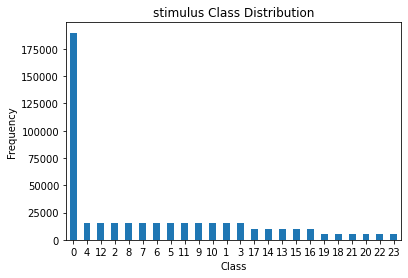

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
449389,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
128532,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.1538,0.2075,0.0024,0.0049,0,0,0,0
121909,0.0391,0.0024,0.0024,0.0049,0.0024,0.0024,0.0073,0.0635,0.0024,0.0024,0,0,0,0
322766,0.0098,0.0024,0.0024,0.0024,0.0024,0.0732,0.3174,0.0903,0.0024,0.3345,9,9,9,9
181487,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0708,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(379647, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379647 entries, 0 to 457927
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          379647 non-null  float64
 1   Emg2          379647 non-null  float64
 2   Emg3          379647 non-null  float64
 3   Emg4          379647 non-null  float64
 4   Emg5          379647 non-null  float64
 5   Emg6          379647 non-null  float64
 6   Emg7          379647 non-null  float64
 7   Emg8          379647 non-null  float64
 8   Emg9          379647 non-null  float64
 9   Emg10         379647 non-null  float64
 10  repetition    379647 non-null  int64  
 11  rerepetition  379647 non-null  int64  
 12  stimulus      379647 non-null  int64  
 13  restimulus    379647 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.4 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [17]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [18]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.490566,-0.777345,-0.606080,-0.442114,-0.569869
1,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.490566,-0.783230,-0.613861,-0.442114,-0.569869
2,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.506282,-0.795246,-0.625453,-0.442114,-0.576104
3,-0.186370,-0.460575,-0.412655,-0.426526,-0.472803,-0.506282,-0.801132,-0.633234,-0.442114,-0.582338
4,-0.186370,-0.460575,-0.412655,-0.426526,-0.472803,-0.537085,-0.807262,-0.637045,-0.442114,-0.595066
...,...,...,...,...,...,...,...,...,...,...
379642,-0.157205,-0.040272,-0.234510,-0.379098,-0.307505,0.046284,-0.172623,0.572508,-0.442114,-0.271664
379643,-0.126824,-0.050597,-0.255115,-0.402328,-0.347986,0.031197,-0.148592,0.607443,-0.442114,-0.290627
379644,-0.097659,-0.124161,-0.297183,-0.426526,-0.390154,-0.030409,-0.190525,0.541542,-0.442114,-0.341540
379645,-0.097659,-0.124161,-0.265846,-0.379098,-0.472803,-0.076299,-0.202541,0.603473,-0.442114,-0.366737


In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = KNeighborsClassifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 90.56894508099566


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37041
           1       0.89      0.87      0.88      2126
           2       0.88      0.83      0.85      2174
           3       0.92      0.90      0.91      2216
           4       0.94      0.88      0.91      2193
           5       0.90      0.84      0.87      2031
           6       0.91      0.84      0.88      2095
           7       0.89      0.87      0.88      2427
           8       0.84      0.80      0.82      2441
           9       0.84      0.76      0.80      2226
          10       0.86      0.77      0.81      2206
          11       0.86      0.79      0.82      2053
          12       0.92      0.86      0.89      2217
          13       0.88      0.78      0.83      1352
          14       0.91      0.83      0.86      1313
          15       0.86      0.83      0.84      1595
          16       0.94      0.90      0.92      1472
 

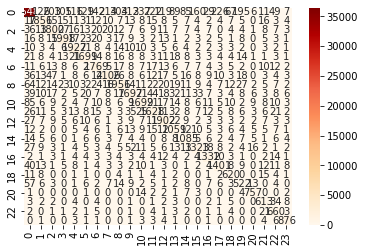

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7638219412616883
MSE: 8.885723692875017
RMSE: 2.980893103228463


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.9045127422046289
Recall Score :  0.9056894508099566
f1_score :  0.9037678719999532
